# <span style="color:#a5d6ff">My first attempt at creating a Biden recognition neural network</span>

### <span style="color:#d2a8ff">**Intro**</span>
This project is the first version of a Biden recognition neural network. This project was inspired by the "Cat vs non-cat" detection assignment in the "Neural Networks and Deep Learning" Coursera course. The goal of this project was to create a rudimentary neural network that could detect whether a provided image was an image of president Joe Biden or not.



### <span style="color:#d2a8ff">**Observations**</span>
- The cost never decreases between iterations
- Low number of input cases leads to a poor accuracy
- Low accuracy
- Only 4 layers



### <span style="color:#d2a8ff">**Credits**</span>
I recently finished the Coursera course "Neural Networks and Deep Learning" by DeepLearning.AI as part of "Deep Learning Specialization" in which they taught the basics on how to create neural networks.
I implemented the L_layer_model function and the other functions in "dnn_app_utils_v3.py" during the assignments, and copied the code over to this notebook.



### <span style="color:#d2a8ff">**The Next Step**</span>
The accuracy of this NN is very low. After learning how to adjust hyperparameters, I would like to revisit this and tweak the learning rate, number of iterations, number of layers, and number of nodes per layer. I could also potentially mess with the dimensions of the images. Additionally, this is a deep L-layer neural network and I would like to try different types of neural networks in the future.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
import cv2 as cv
import glob

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# take in input images and convert to numpy training data
images = []
py_train_x = []
py_train_y = [[]]

for filename in glob.glob('inputImages/biden/*.*'):
	images.append(filename)
	img = cv.imread(images[0])
	resized = cv.resize(img, (64,64), interpolation = cv.INTER_LINEAR)
	py_train_x.append(resized)
	py_train_y[0].append(1)

for filename in glob.glob('inputImages/notbiden/*.*'):
	images.append(filename)
	img = cv.imread(images[0])
	resized = cv.resize(img, (64,64), interpolation = cv.INTER_LINEAR)
	py_train_x.append(resized)
	py_train_y[0].append(0)

train_x_orig = np.asarray(py_train_x)

train_y = np.asarray(py_train_y)

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.

In [3]:
# define the number of nodes in each layer
layers_dims = [12288, 20, 7, 5, 1]

In [4]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = [] # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [5]:
print("DIM Train X: " + str(train_x.shape))
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

DIM Train X: (12288, 53)
Cost after iteration 0: 0.7038951382583154
Cost after iteration 100: 0.6930804594389711
Cost after iteration 200: 0.6930414968978039
Cost after iteration 300: 0.6930161754227374
Cost after iteration 400: 0.6929997190673554
Cost after iteration 500: 0.6929890240915038
Cost after iteration 600: 0.6929820734226162
Cost after iteration 700: 0.6929775561786861
Cost after iteration 800: 0.6929746204199015
Cost after iteration 900: 0.6929727124700904
Cost after iteration 1000: 0.6929714724942531
Cost after iteration 1100: 0.6929706666350122
Cost after iteration 1200: 0.6929701429081288
Cost after iteration 1300: 0.6929698025389065
Cost after iteration 1400: 0.6929695813336374
Cost after iteration 1500: 0.6929694375728455
Cost after iteration 1600: 0.6929693441430755
Cost after iteration 1700: 0.6929692834233271
Cost after iteration 1800: 0.6929692439617414
Cost after iteration 1900: 0.6929692183157787
Cost after iteration 1999: 0.6929692017821681


In [6]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.5094339622641509


Accuracy: 1.0
[[1.]]


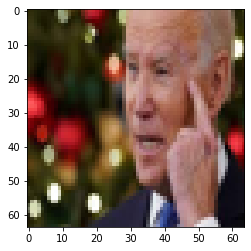

In [7]:
my_image = "biden.jpg" # change this to the name of your image file 
my_label_y = [1] # the true classsification of your image (1 -> Biden, 0 -> not-Biden)
num_px = 64
fname = "testingImages/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

prediction = predict(image, my_label_y, parameters)

print (prediction)

Accuracy: 0.0
[[1.]]


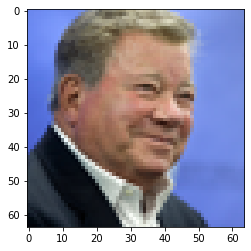

In [8]:
my_image = "man.jpg" # change this to the name of your image file 
my_label_y = [0] # the true classsification of your image (1 -> Biden, 0 -> not-Biden)
num_px = 64
fname = "testingImages/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

prediction = predict(image, my_label_y, parameters)

print (prediction)

Accuracy: 1.0
[[0.]]


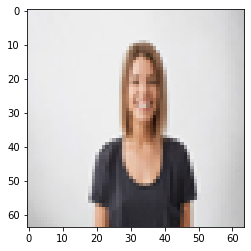

In [9]:
my_image = "woman.jpg" # change this to the name of your image file 
my_label_y = [0] # the true classsification of your image (1 -> Biden, 0 -> not-Biden)
num_px = 64
fname = "testingImages/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

prediction = predict(image, my_label_y, parameters)

print (prediction)

Accuracy: 1.0
[[0.]]


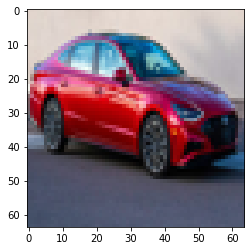

In [10]:
my_image = "car.jpg" # change this to the name of your image file 
my_label_y = [0] # the true classsification of your image (1 -> Biden, 0 -> not-Biden)
num_px = 64
fname = "testingImages/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

prediction = predict(image, my_label_y, parameters)

print (prediction)

Accuracy: 0.0
[[1.]]


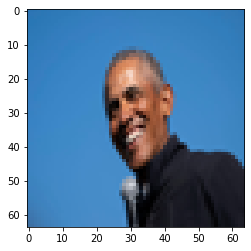

In [11]:
my_image = "obama.jpg" # change this to the name of your image file 
my_label_y = [0] # the true classsification of your image (1 -> Biden, 0 -> not-Biden)
num_px = 64
fname = "testingImages/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

prediction = predict(image, my_label_y, parameters)

print (prediction)